### 1. The necessary libraries were imported

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import numpy as np

### 2. The ETF symbols for this analysis were downloaded from Yahoo Finance

In [66]:
ETF_symbols=["SPY","XLE","XLF","XLI","XLK","XLY","XLU","XLV","XLP","XLRE","XLB"]
ETF_data={}
start_date="2019-01-01"
end_date="2024-01-01"

for ticker in ETF_symbols:
    data=yf.download(ticker,start=start_date,end=end_date)
    ETF_data[ticker]=data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### 3. The downloaded data for each ETF was displayed

In [68]:
for ticker in ETF_symbols:
    data = ETF_data[ticker]
    print("\nTicker:",ticker,"\n",data.head())


Ticker: SPY 
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02  245.979996  251.210007  245.949997  250.179993  229.104202   
2019-01-03  248.229996  248.570007  243.669998  244.210007  223.637177   
2019-01-04  247.589996  253.110001  247.169998  252.389999  231.128006   
2019-01-07  252.690002  255.949997  251.690002  254.380005  232.950394   
2019-01-08  256.820007  257.309998  254.000000  256.769989  235.139053   

               Volume  
Date                   
2019-01-02  126925200  
2019-01-03  144140700  
2019-01-04  142628800  
2019-01-07  103139100  
2019-01-08  102512600  

Ticker: XLE 
                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-02  56.439999  58.869999  56.150002  58.480000  44.678516  24892600
2019-01-03  58.650002  58.860001  57.240002  57.900002 

### 4. A line graph was constructed to visually compare the adjusted close prices of the ETFs

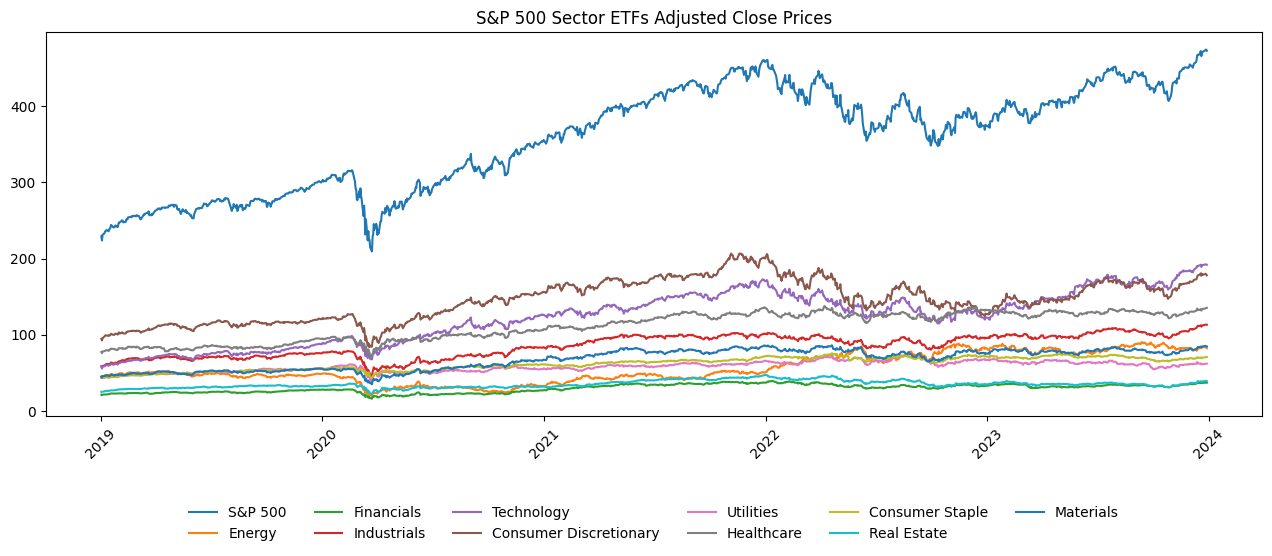

In [70]:
for ticker in ETF_symbols:
    data = ETF_data[ticker]
    ETF_Price=data['Adj Close']
    plt.plot(ETF_Price,label=ticker)
    plt.xticks(rotation=45)
    plt.style.use('default')
    plt.subplots_adjust(left=0.1, right=2, top=0.9, bottom=0.1)
    new_labels=['S&P 500','Energy', 'Financials', 'Industrials','Technology','Consumer Discretionary','Utilities','Healthcare','Consumer Staple','Real Estate','Materials']
    plt.title('S&P 500 Sector ETFs Adjusted Close Prices', fontsize=12)
    plt.legend(new_labels,ncol=6,loc='upper center',bbox_to_anchor=(0.5, -0.2), frameon=False)

plt.show()



### 5. The returns of the ETFs were calculated and concatonated into one table to create a correlation matrix

In [72]:
df_list=[]
for ticker in ETF_symbols:
    data = ETF_data[ticker]
    data["Returns"] = data["Adj Close"].pct_change()*100
    ETF_returns=data["Returns"].dropna()
    returns_df=pd.DataFrame({f"{ticker} Returns":ETF_returns})
    df_list.append(returns_df)
    
combined_df=pd.concat(df_list,axis=1)
print(combined_df)


            SPY Returns  XLE Returns  XLF Returns  XLI Returns  XLK Returns  \
Date                                                                          
2019-01-03    -2.386262    -0.991794    -2.248128    -3.042928    -5.046759   
2019-01-04     3.349546     3.402410     3.321981     3.791625     4.432002   
2019-01-07     0.788475     1.486557     0.123666     0.813499     0.894310   
2019-01-08     0.939539     0.773542     0.082339     1.370262     0.838024   
2019-01-09     0.467337     1.584192     0.493630     0.675898     1.294559   
...                 ...          ...          ...          ...          ...   
2023-12-22     0.200971     0.295052     0.214723     0.479615     0.130349   
2023-12-26     0.422253     0.859013     0.401718     0.707153     0.416561   
2023-12-27     0.180806    -0.443342     0.320089     0.149211    -0.005192   
2023-12-28     0.037774    -1.523506     0.292471     0.026295     0.119277   
2023-12-29    -0.289498    -0.226117    -0.318147   

### 6. A correlation matrix was constructed to identify the relationships between the performances of the Sector ETFs from 1 January 2021 to 1 January 2024

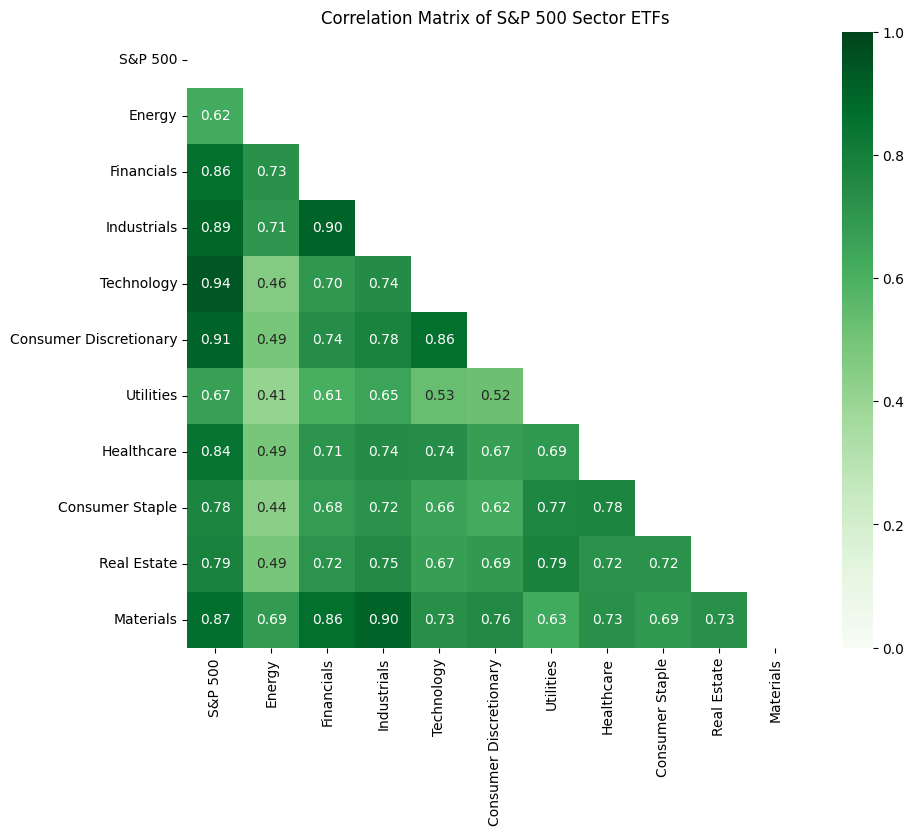

In [74]:
combined_df.rename(columns={'SPY Returns': 'S&P 500','XLE Returns': 'Energy','XLF Returns': 'Financials','XLI Returns': 'Industrials'
                          ,'XLK Returns': 'Technology','XLY Returns': 'Consumer Discretionary','XLU Returns': 'Utilities'
                          ,'XLV Returns': 'Healthcare','XLP Returns': 'Consumer Staple','XLRE Returns': 'Real Estate'
                          ,'XLB Returns': 'Materials'}, inplace=True)
column_titles=returns_df.columns.tolist()
fig, ax = plt.subplots(figsize=(10,8))
corr_matrix=combined_df.corr()
mask_=np.triu(np.ones_like(corr_matrix,dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', vmin=0, vmax=1,square=True,fmt=".2f",mask=mask_)
plt.title('Correlation Matrix of S&P 500 Sector ETFs', fontsize=12)
plt.show()